In [ ]:
!pip install pyspark

In [ ]:
from pyspark.sql.session import SparkSession
spark = SparkSession.builder.getOrCreate()
from pyspark.sql import *

In [ ]:
df = spark.read.csv('/content/ObesityDataSet_raw_and_data_sinthetic.csv', inferSchema=True, header=True)

In [ ]:
df.show(10)

+------+----+------+------+------------------------------+----+----+---+---------+-----+----+---+---+---+----------+--------------------+-------------------+
|Gender| Age|Height|Weight|family_history_with_overweight|FAVC|FCVC|NCP|     CAEC|SMOKE|CH2O|SCC|FAF|TUE|      CALC|              MTRANS|         NObeyesdad|
+------+----+------+------+------------------------------+----+----+---+---------+-----+----+---+---+---+----------+--------------------+-------------------+
|Female|21.0|  1.62|  64.0|                           yes|  no| 2.0|3.0|Sometimes|   no| 2.0| no|0.0|1.0|        no|Public_Transporta...|      Normal_Weight|
|Female|21.0|  1.52|  56.0|                           yes|  no| 3.0|3.0|Sometimes|  yes| 3.0|yes|3.0|0.0| Sometimes|Public_Transporta...|      Normal_Weight|
|  Male|23.0|   1.8|  77.0|                           yes|  no| 2.0|3.0|Sometimes|   no| 2.0| no|2.0|1.0|Frequently|Public_Transporta...|      Normal_Weight|
|  Male|27.0|   1.8|  87.0|                         

In [ ]:
df.columns

['Gender',
 'Age',
 'Height',
 'Weight',
 'family_history_with_overweight',
 'FAVC',
 'FCVC',
 'NCP',
 'CAEC',
 'SMOKE',
 'CH2O',
 'SCC',
 'FAF',
 'TUE',
 'CALC',
 'MTRANS',
 'NObeyesdad']

In [ ]:
df = df.toDF('Gender', 'Age', 'Height', 'Weight', 'Family_History_With_Overweight', 'High_Calorie_Food', 'Vegetables', 'Main_Meals', 
              'Food_Bet_Meals', 'Smoke', 'Water', 'Calorie_Consumption', 'Physical_Activity_Frequency', 'Time_Tech', 'Alcohol',
              'Transportation', 'Obesity_Level')

In [ ]:
df.columns

['Gender',
 'Age',
 'Height',
 'Weight',
 'Family_History_With_Overweight',
 'High_Calorie_Food',
 'Vegetables',
 'Main_Meals',
 'Food_Bet_Meals',
 'Smoke',
 'Water',
 'Calorie_Consumption',
 'Physical_Activity_Frequency',
 'Time_Tech',
 'Alcohol',
 'Transportation',
 'Obesity_Level']

In [ ]:
df.printSchema()

root
 |-- Gender: string (nullable = true)
 |-- Age: double (nullable = true)
 |-- Height: double (nullable = true)
 |-- Weight: double (nullable = true)
 |-- Family_History_With_Overweight: string (nullable = true)
 |-- High_Calorie_Food: string (nullable = true)
 |-- Vegetables: double (nullable = true)
 |-- Main_Meals: double (nullable = true)
 |-- Food_Bet_Meals: string (nullable = true)
 |-- Smoke: string (nullable = true)
 |-- Water: double (nullable = true)
 |-- Calorie_Consumption: string (nullable = true)
 |-- Physical_Activity_Frequency: double (nullable = true)
 |-- Time_Tech: double (nullable = true)
 |-- Alcohol: string (nullable = true)
 |-- Transportation: string (nullable = true)
 |-- Obesity_Level: string (nullable = true)



In [ ]:
df.describe('Age').show()

+-------+-----------------+
|summary|              Age|
+-------+-----------------+
|  count|             2111|
|   mean|24.31259990857412|
| stddev|6.345968273732226|
|    min|             14.0|
|    max|             61.0|
+-------+-----------------+



In [ ]:
df.filter(df.Obesity_Level=='Overweight_Level_I').show()

+------+----+------+------+------------------------------+-----------------+----------+----------+--------------+-----+-----+-------------------+---------------------------+---------+----------+--------------------+------------------+
|Gender| Age|Height|Weight|Family_History_With_Overweight|High_Calorie_Food|Vegetables|Main_Meals|Food_Bet_Meals|Smoke|Water|Calorie_Consumption|Physical_Activity_Frequency|Time_Tech|   Alcohol|      Transportation|     Obesity_Level|
+------+----+------+------+------------------------------+-----------------+----------+----------+--------------+-----+-----+-------------------+---------------------------+---------+----------+--------------------+------------------+
|  Male|27.0|   1.8|  87.0|                            no|               no|       3.0|       3.0|     Sometimes|   no|  2.0|                 no|                        2.0|      0.0|Frequently|             Walking|Overweight_Level_I|
|Female|23.0|  1.65|  70.0|                           yes|  

In [ ]:
df.filter(df.Obesity_Level=='Overweight_Level_I').count()

290

In [ ]:
df.crosstab('Obesity_Level', 'Gender').show()

+--------------------+------+----+
|Obesity_Level_Gender|Female|Male|
+--------------------+------+----+
|     Obesity_Type_II|     2| 295|
| Insufficient_Weight|   173|  99|
| Overweight_Level_II|   103| 187|
|       Normal_Weight|   141| 146|
|      Obesity_Type_I|   156| 195|
|    Obesity_Type_III|   323|   1|
|  Overweight_Level_I|   145| 145|
+--------------------+------+----+



In [ ]:
df.registerTempTable('table')

In [ ]:
sqlContext = SQLContext(spark)

In [ ]:
sqlContext.sql('Select Obesity_Level, MIN(weight/(height * height)) as MinBMI, MAX(weight/(height * height)) as MaxBMI from table group by Obesity_Level order by MinBMI desc').show()

+-------------------+------------------+------------------+
|      Obesity_Level|            MinBMI|            MaxBMI|
+-------------------+------------------+------------------+
|   Obesity_Type_III| 36.77440042603727| 50.81175280566433|
|    Obesity_Type_II|  34.0485094797693| 39.78665187420884|
|     Obesity_Type_I|29.911958308167144| 35.17109488979771|
|Overweight_Level_II|25.713513085656647| 30.36287670928922|
| Overweight_Level_I|22.826738618008303|28.769607415728178|
|      Normal_Weight| 18.49112426035503|24.913494809688583|
|Insufficient_Weight|12.998684889724604| 19.08220593702959|
+-------------------+------------------+------------------+



In [ ]:
sqlContext.sql('Select count(*) as Highly_Obes_People_Having_Family_History_With_Overweight from table where family_history_with_overweight="yes" AND Obesity_Level="Obesity_Type_III"').show()

+--------------------------------------------------------+
|Highly_Obes_People_Having_Family_History_With_Overweight|
+--------------------------------------------------------+
|                                                     324|
+--------------------------------------------------------+



In [ ]:
sqlContext.sql('Select Transportation, count(Transportation) as count from table where Obesity_Level LIKE "O%" group by Transportation').show()

+--------------------+-----+
|      Transportation|count|
+--------------------+-----+
|                Bike|    3|
|             Walking|   18|
|          Automobile|  366|
|           Motorbike|    5|
|Public_Transporta...| 1160|
+--------------------+-----+



In [ ]:
sqlContext.sql('Select distinct(Food_Bet_Meals) from table').show()

+--------------+
|Food_Bet_Meals|
+--------------+
|     Sometimes|
|    Frequently|
|            no|
|        Always|
+--------------+



In [ ]:
sqlContext.sql('Select Smoke, count(Smoke) as Count from table where Obesity_Level in ("Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III") group by smoke').show()

+-----+-----+
|Smoke|Count|
+-----+-----+
|   no|  950|
|  yes|   22|
+-----+-----+



In [ ]:
pdf = df.toPandas()

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [ ]:
import seaborn as sns
sns.set(rc={'figure.figsize':(12, 8)})

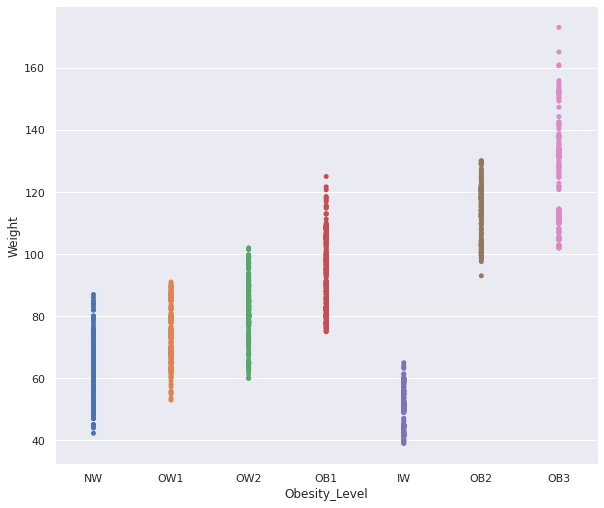

In [ ]:
b=sns.catplot(x="Obesity_Level", y="Weight", jitter=False, height=7, aspect = 1.2, data=pdf)
b.set(xticklabels=['NW', 'OW1', 'OW2', 'OB1', 'IW', 'OB2', 'OB3'])
plt.show()

In [ ]:
pdf[pdf['Obesity_Level']=='Obesity_Type_I'].groupby(['Transportation'])['Transportation'].count()

Transportation
Automobile               110
Motorbike                  3
Public_Transportation    236
Walking                    2
Name: Transportation, dtype: int64

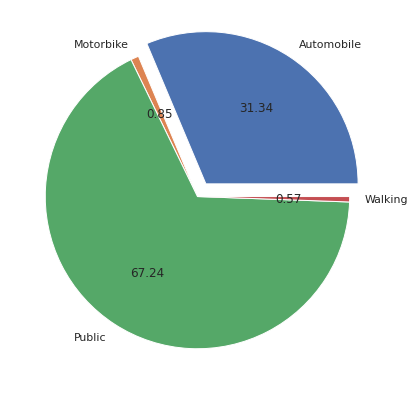

In [ ]:
data=pdf[pdf['Obesity_Level']=='Obesity_Type_I'].groupby(['Transportation'])['Transportation'].count()
fig = plt.figure(figsize=(10, 7)) 
plt.pie(data, explode=(0.1, 0, 0, 0), labels=['Automobile', 'Motorbike', 'Public', 'Walking'], autopct='%.2f')
plt.show()

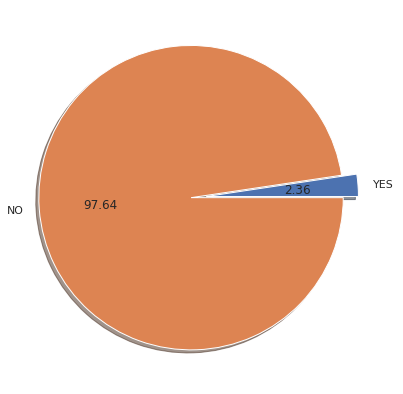

In [ ]:
data=pdf[pdf['Obesity_Level']=='Obesity_Type_II'].groupby(['High_Calorie_Food'])['High_Calorie_Food'].count()
labels=["YES", "NO"]
fig = plt.figure(figsize =(10, 7)) 
plt.pie(data, labels=labels, explode=(0, 0.1), autopct='%.2f', shadow=True) 
plt.show()

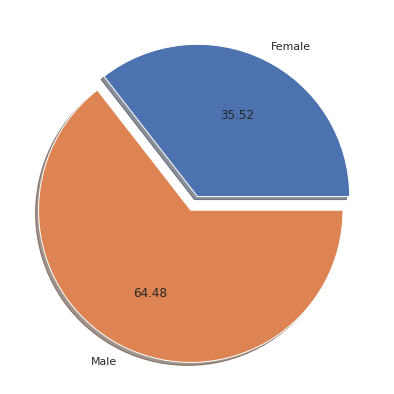

In [ ]:
data=pdf[pdf['Obesity_Level']=='Overweight_Level_II'].groupby(['Gender'])['Gender'].count()
labels=["Female", "Male"]
fig = plt.figure(figsize =(10, 7)) 
plt.pie(data, labels=labels, explode=(0, 0.1), autopct='%.2f', shadow=True) 
plt.show()

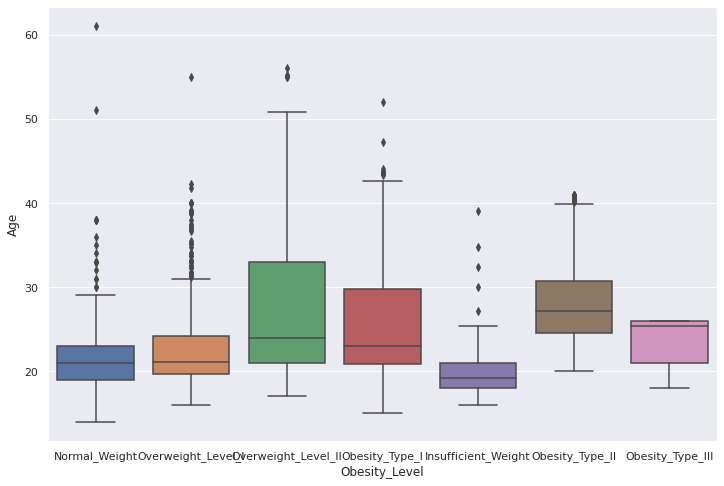

In [ ]:
sns.boxplot(x="Obesity_Level", y="Age", data=pdf)
plt.show()

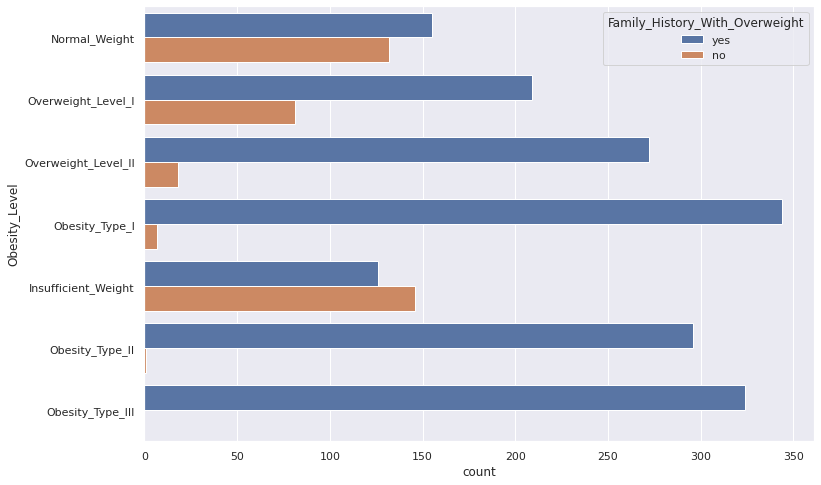

In [ ]:
sns.countplot(y=pdf.Obesity_Level, hue=pdf.Family_History_With_Overweight)
plt.show()

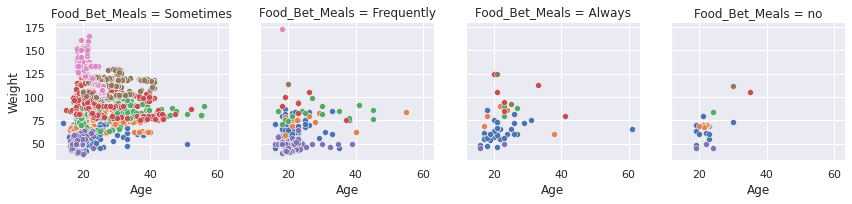

In [ ]:
cond_plot = sns.FacetGrid(data=pdf, col='Food_Bet_Meals', hue='Obesity_Level', col_wrap=4)
cond_plot.map(sns.scatterplot, 'Age', 'Weight');

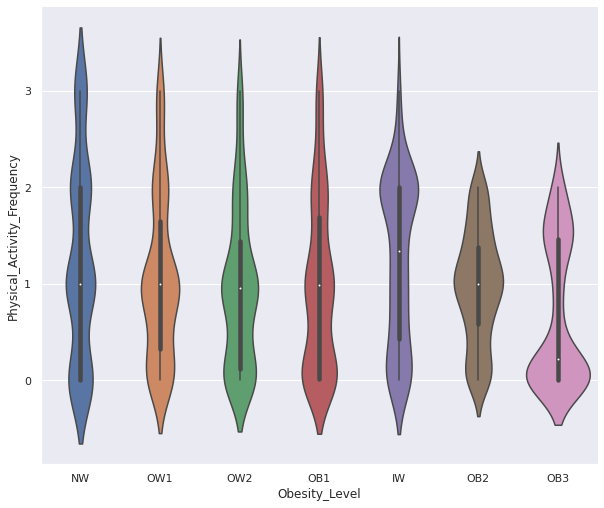

In [ ]:
b=sns.catplot(x="Obesity_Level", y="Physical_Activity_Frequency", jitter=False, height=7, aspect = 1.2, kind="violin", data=pdf)
b.set(xticklabels=['NW', 'OW1', 'OW2', 'OB1', 'IW', 'OB2', 'OB3'])
plt.show()

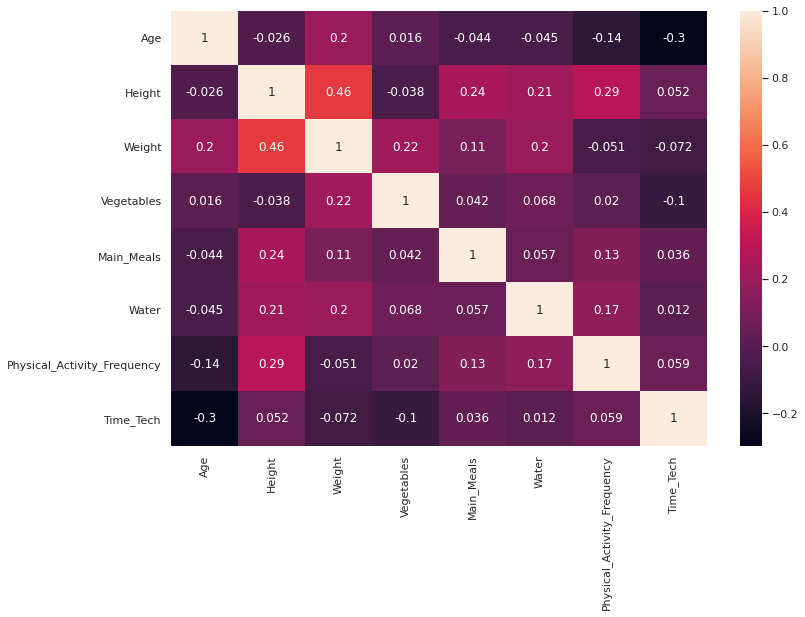

In [ ]:
sns.heatmap(pdf.corr(), annot=True)